<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/Hunger_games_Hector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

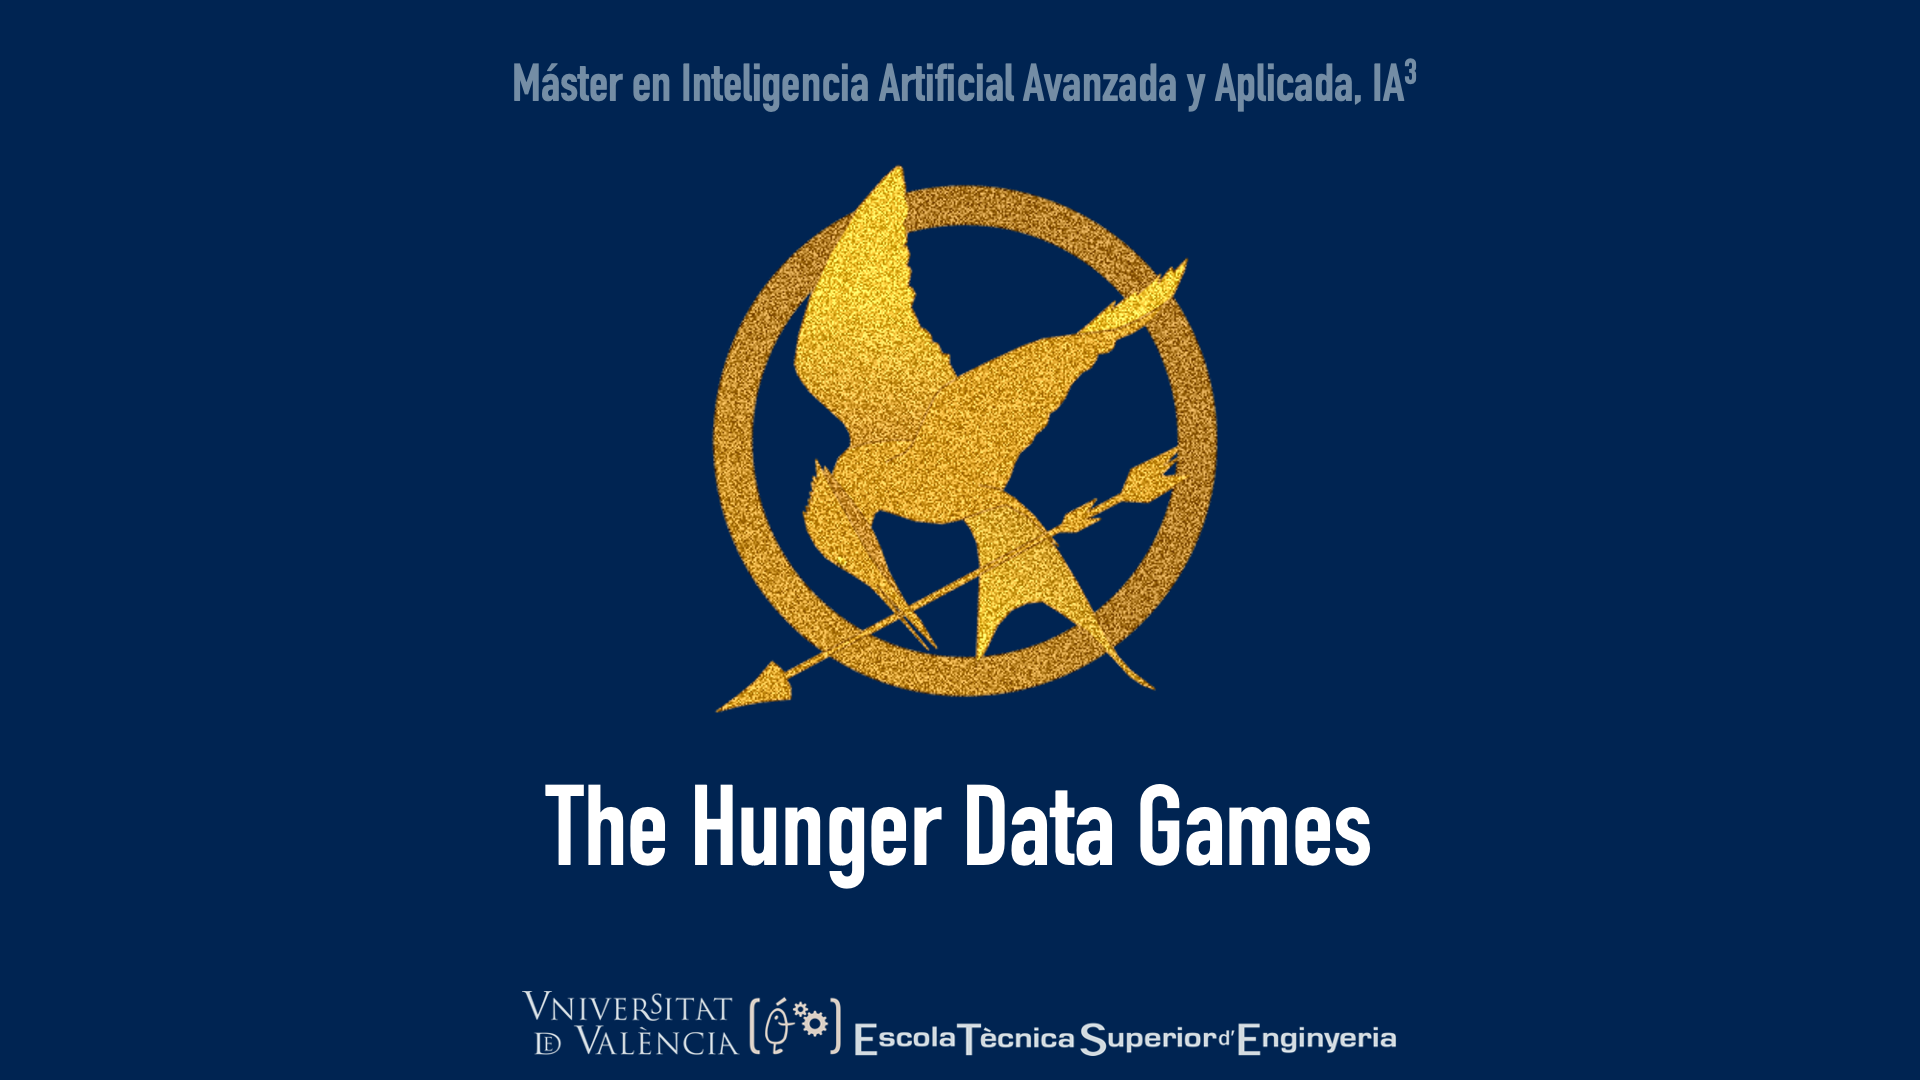

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



## Import Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score,balanced_accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

## Import Dataset

In [ ]:
url ='https://raw.githubusercontent.com/hecescam/IA3/main/glass.csv'
dataframe = pd.read_csv(url,header=0)
#dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
dataframe.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Dataframe size

In [ ]:
dataframe.shape

(214, 10)

## Dataframe Info (type features)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Descriptive statistics

In [ ]:
dataframe.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Null data analysis

In [ ]:
dataframe.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Correlation matrix (features)

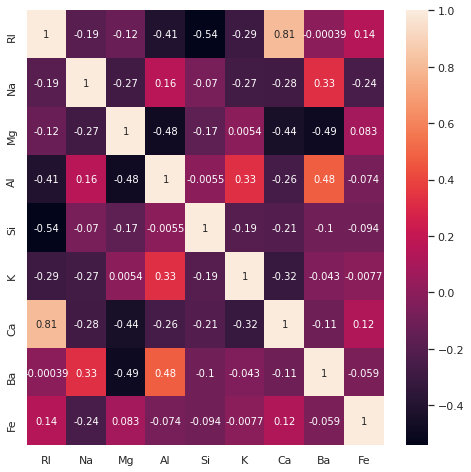

In [ ]:
corrMatrix = dataframe.iloc[:,0:-1].corr()
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Target variable (Type) distribution

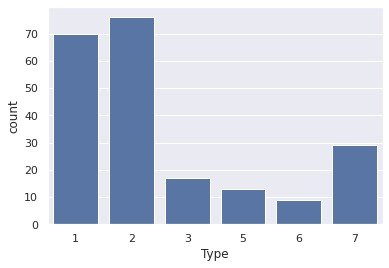

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=dataframe['Type'],color='b')
plt.show()

### There are unbalanced classes and there is no class 4

## Relationship between variables

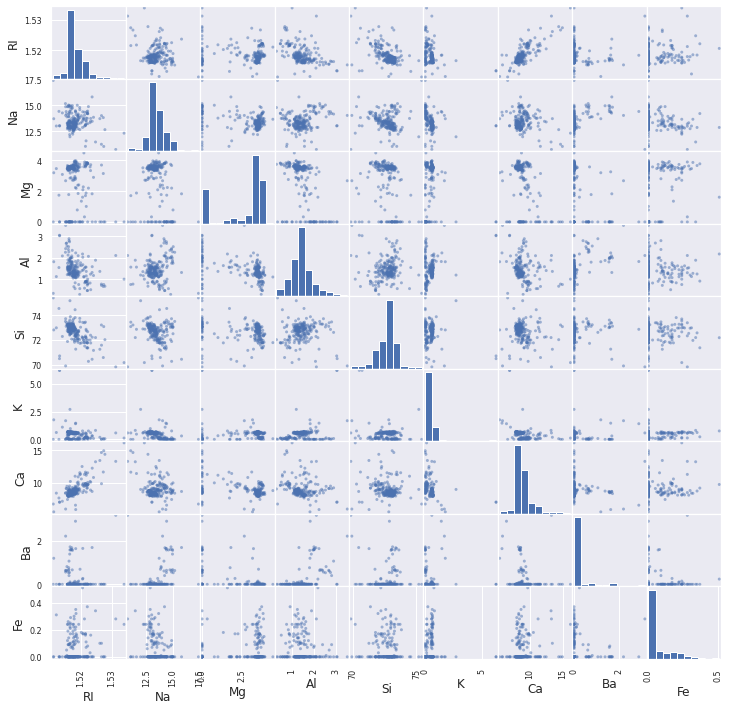

In [ ]:
pd.plotting.scatter_matrix(dataframe.iloc[:,0:-1], figsize=(12.0,12.0));

## Relationship between variables splitted by target

In [ ]:
fig = px.scatter_matrix(data_frame=dataframe, dimensions=dataframe.iloc[:,0:-1].columns, color="Type")
fig.show()

## Features with higher linear correlation (according to correlation matrix)

In [ ]:
fig = px.scatter(dataframe, x="Ca", y="RI" , color="Type")
fig.show()

## Data distribution by variable

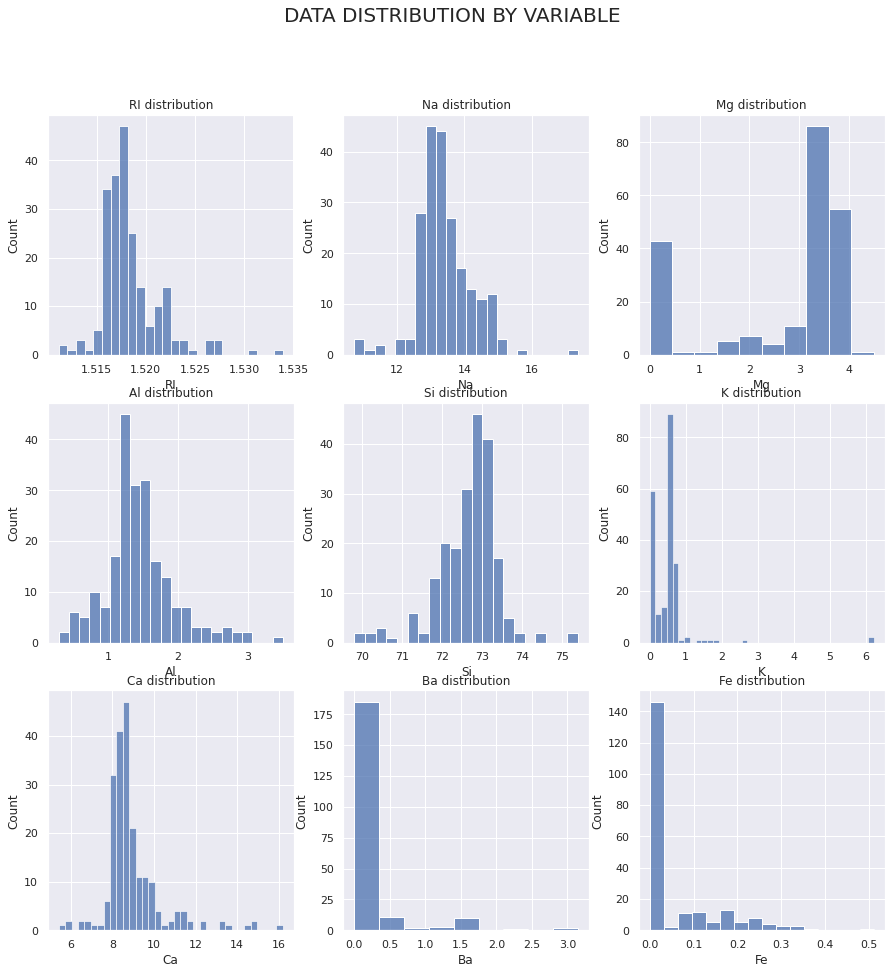

In [ ]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3, 3,figsize=(15, 15))
n=0
for i in range(0,3):
  for j in range(0,3):
    sns.histplot(data=dataframe[dataframe.iloc[:,0:-1].columns[n]] ,ax=axes[i,j]).set(title=f"{dataframe.iloc[:,0:-1].columns[n]} distribution")
    n+=1

f.suptitle('DATA DISTRIBUTION BY VARIABLE', fontsize=20)
plt.show()

## Outlier analysis by variable

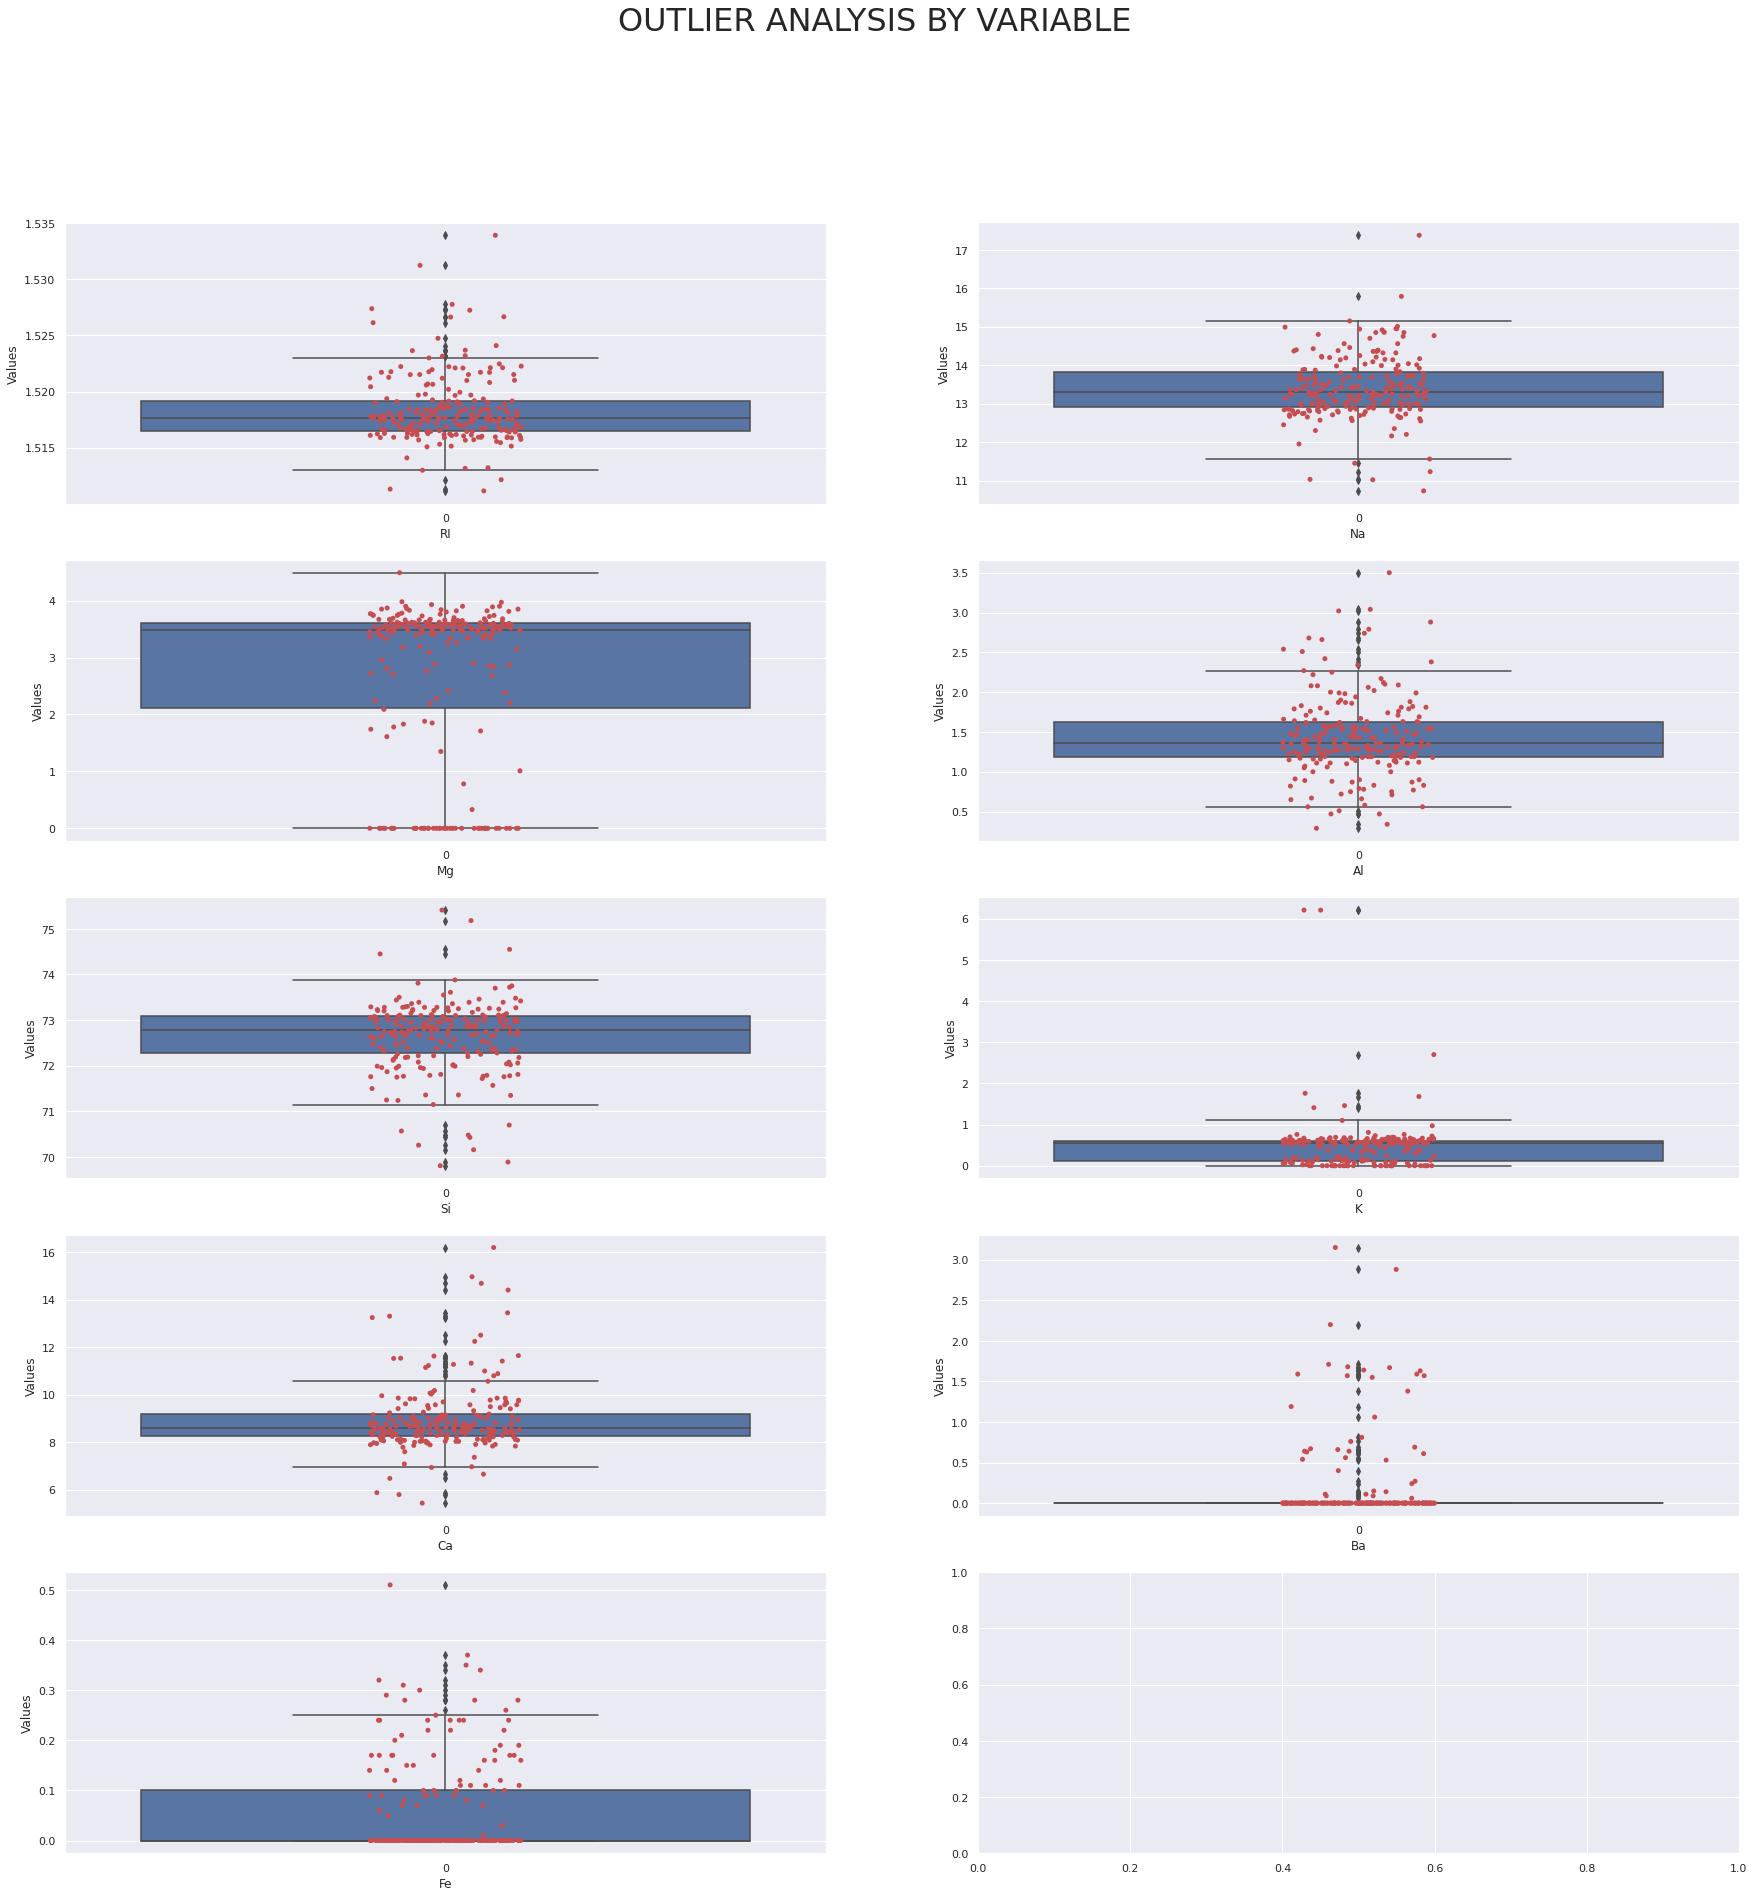

In [ ]:
f, axes = plt.subplots(5, 2,figsize=(30, 30))
n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(data=dataframe[dataframe.iloc[:,0:-1].columns[n]] ,ax=axes[i,j])
    sns.stripplot(data=dataframe[dataframe.iloc[:,0:-1].columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=dataframe.iloc[:,0:-1].columns[n], ylabel='Values')
    n+=1
    if n==len(dataframe.iloc[:,0:-1].columns):
      break
f.suptitle('OUTLIER ANALYSIS BY VARIABLE', fontsize=32)
plt.show()

## Outlier analysis by variable (splitted by target level)

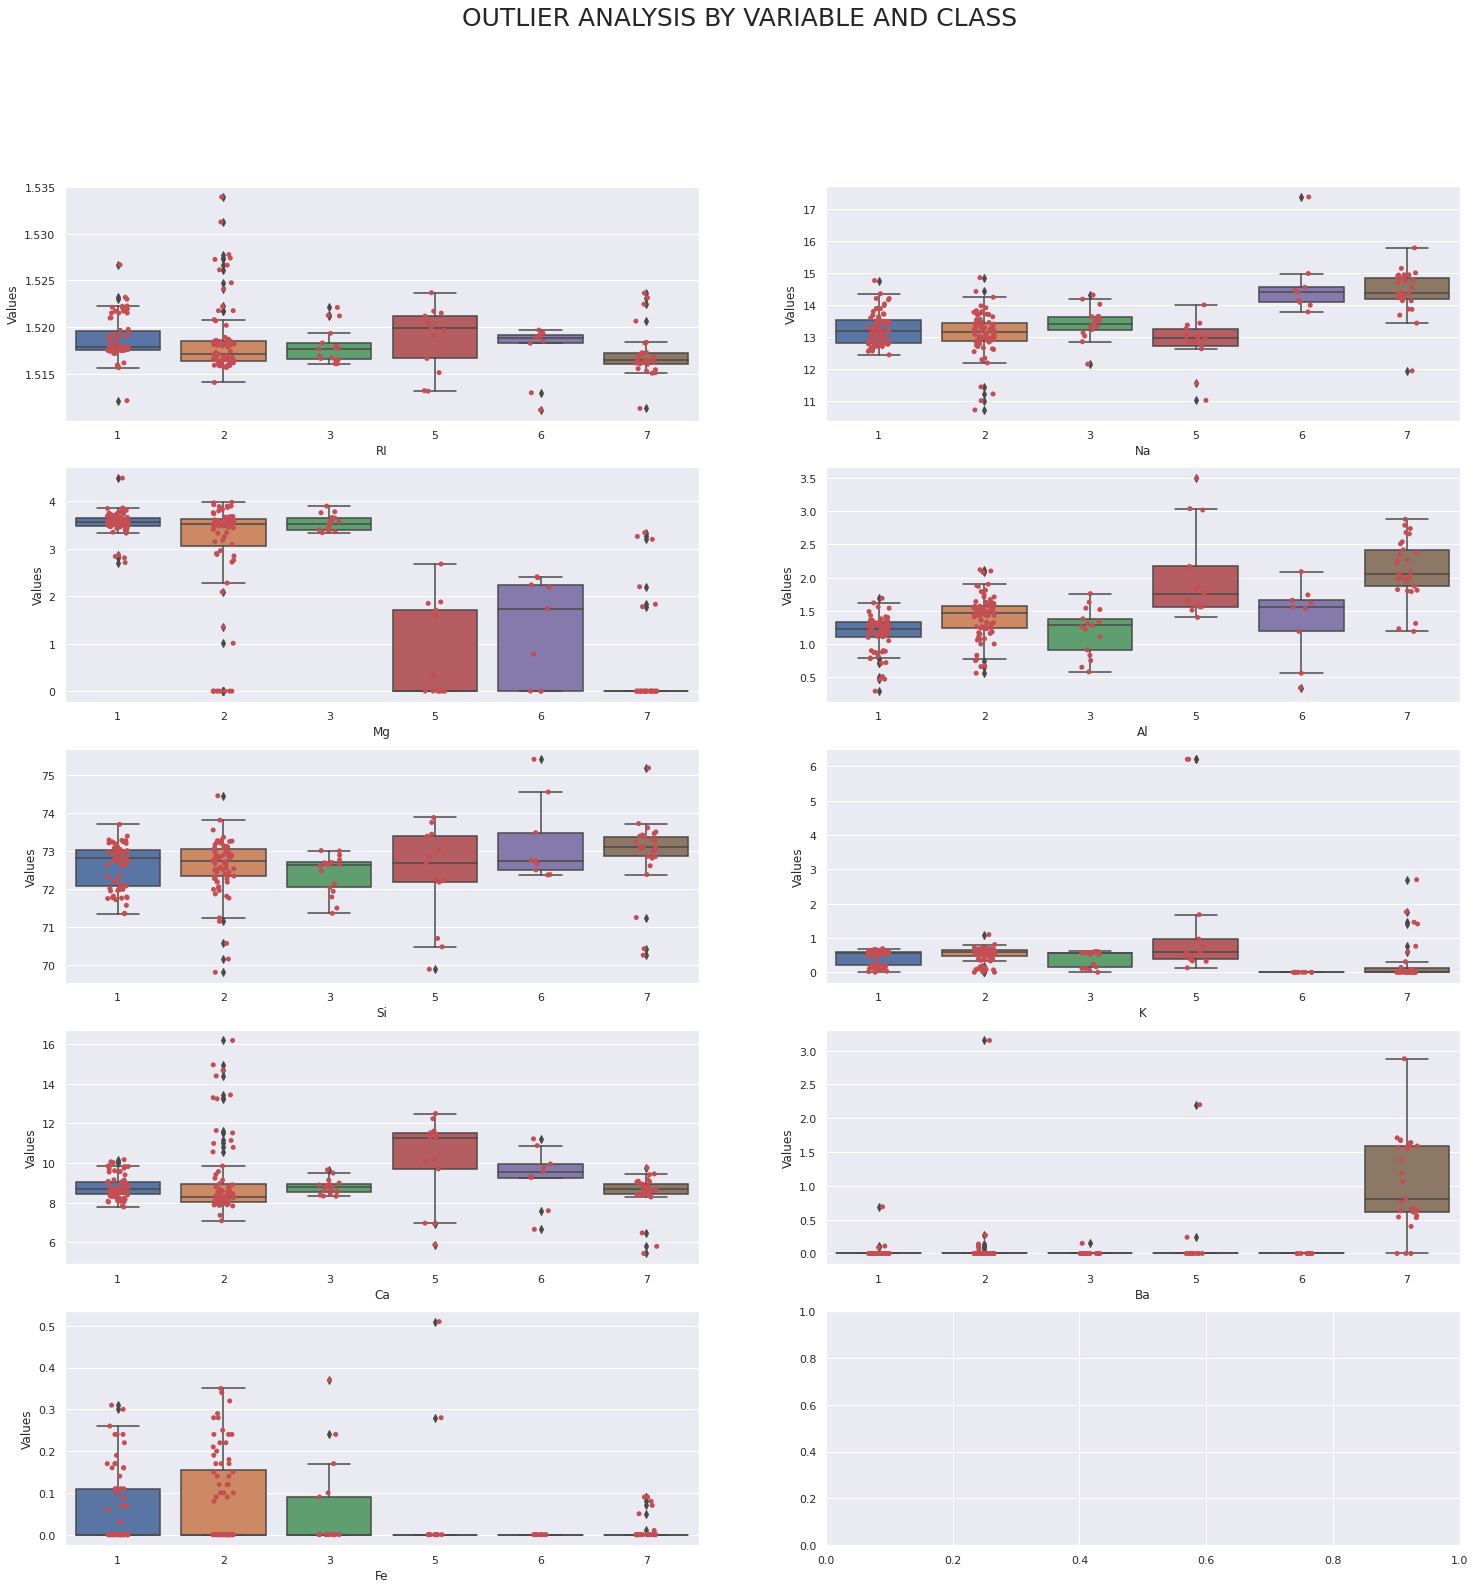

In [ ]:
f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=dataframe['Type'],y=dataframe[dataframe.iloc[:,0:-1].columns[n]],ax=axes[i,j])
    sns.stripplot(x=dataframe['Type'],y=dataframe[dataframe.iloc[:,0:-1].columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=dataframe.iloc[:,0:-1].columns[n], ylabel='Values')
    n+=1
    if n==len(dataframe.iloc[:,0:-1].columns):
      break
f.suptitle('OUTLIER ANALYSIS BY VARIABLE AND CLASS', fontsize=25)
plt.show()

### In the graphics we can see  outliers

## Functions for removing outliers

### - Copy dataframe 

In [ ]:
dataframe_clean=dataframe.copy()

### - Remove outlier out of each variable distribution function

In [ ]:
def outlierByIQR(data,threshold,multiplier):
    list_outlier = []
    variables = list(data.dtypes[data.dtypes != int].index)
    for i,var in enumerate(variables):
      upper_limit = data[var].quantile(q=0.75) + (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      lower_limit = data[var].quantile(q=0.25) - (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      print(var, upper_limit, lower_limit)
      skew_variable = data[var].skew()
      if skew_variable > 0.3:
        
        #OUTLIER SUPERIOR
        list_outlier.append(list(data[var]>upper_limit))
      elif skew_variable < -0.3:
        
        #OUTLIER INFERIOR
        list_outlier.append(list(data[var]<lower_limit))
      else:
        print(f"Skew: {skew_variable}")
        print("Otra casuistica")
    data_ = pd.DataFrame(list_outlier).T.replace(True,1).replace(False,0)  
    data = data[~data.index.isin(list(data_[data_.sum(axis=1) >= threshold].index))]
    return data

### - Replace outliers by IQR limit (lower/upper) function

In [ ]:
def outlierByMedian(data,multiplier,skew_flag = 0):
    list_outlier = []
    variables = list(data.dtypes[data.dtypes != int].index)
    for i,var in enumerate(variables):
      upper_limit = data[var].quantile(q=0.75) + (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      lower_limit = data[var].quantile(q=0.25) - (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      print(var, upper_limit, lower_limit)
      if skew_flag == 1:
        skew_variable = data[var].skew()
        if skew_variable > 0.3:
          print(f"Skew positivo: {skew_variable}")
          #OUTLIER SUPERIOR
          data.loc[data[var]>upper_limit,var] = upper_limit
        elif skew_variable < -0.3:
          print(f"Skew negativo: {skew_variable}")
          #OUTLIER INFERIOR
          data.loc[data[var]<lower_limit,var] = lower_limit
        else:
          print(f"Skew: {skew_variable}")
          print("Otra casuistica")
      else:
        data.loc[data[var]>upper_limit,var] = upper_limit
        data.loc[data[var]<lower_limit,var] = lower_limit

    return data

### - Remove outlier out of each variable (more than 2 outliers for sample)

In [ ]:
from collections import Counter
def outlier_hunt (df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataframe_clean[dataframe_clean.iloc[:,0:-1].columns]))))   

The dataset contains 14 observations with more than 2 outliers


### - Remove outlier out of each variable and class

In [ ]:
def clean_outliers (df,feature,clas):
  df_aux=pd.DataFrame(df[feature][df.type_of_glass==clas])
  list_1=df_aux.index
  Q1 = df_aux.quantile(q=.25)
  Q3 = df_aux.quantile(q=.75)
  IQR = Q3-Q1
  df_clean = df_aux[~((df_aux < (Q1-1.20*IQR)) | (df_aux > (Q3+1.20*IQR))).any(axis=1)]
  list_2=df_clean.index
  list_outliers=np.setdiff1d(list_1,list_2)
  return df.drop(list_outliers)

## Remove outliers with -> Remove outlier out of each variable (more than 2 outliers for sample)

In [ ]:
dataframe_clean=dataframe_clean.drop(outlier_hunt(dataframe_clean[dataframe_clean.iloc[:,0:-1].columns]))
dataframe_clean

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### We have eliminated 14 outliers

## Split features and target variables

In [ ]:
X=dataframe_clean.drop(columns='Type')
Y=dataframe_clean.loc[:,['Type']]


### - New target variable distribution

## Train Test Split

In [ ]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Normalize numeric features
### - Normalize Train

In [ ]:
#scaler=StandardScaler()
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
X_train_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
81,0.241997,0.538835,0.768374,0.440154,0.591463,0.225926,0.106557,0.0,0.000000
113,0.433419,0.589806,0.853007,0.374517,0.465447,0.211111,0.154372,0.0,0.274510
118,0.293214,0.550971,0.810690,0.478764,0.461382,0.240741,0.129781,0.0,0.568627
151,0.583867,0.798544,0.868597,0.208494,0.252033,0.000000,0.329235,0.0,0.000000
8,0.450064,0.730583,0.797327,0.416988,0.369919,0.207407,0.166667,0.0,0.000000


### - Normalize Test

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
X_test_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
50,0.707426,0.652913,0.828508,0.084942,0.302846,0.033333,0.407104,0.0,0.313725
133,0.374520,0.650485,0.875278,0.482625,0.315041,0.200000,0.154372,0.0,0.294118
37,0.372599,0.415049,0.775056,0.409266,0.548780,0.237037,0.218579,0.0,0.000000
155,0.275928,0.487864,0.757238,0.374517,0.558943,0.192593,0.204918,0.0,0.000000
19,0.332907,0.483010,0.788419,0.540541,0.502033,0.200000,0.185792,0.0,0.137255


## Machine Learning
## Support Vectors Machine

### - Tunning model with GridSearchCV

In [ ]:
param_grid_svc = {'kernel':['linear','poly','rbf'],'C': [1,2,3], 'gamma': ['scale',1,5],'class_weight': ['balanced']}#,'probability':[True]}
model_svc = SVC(random_state=123)
                                      
grid_svc = GridSearchCV(model_svc, param_grid_svc,cv=3,scoring=['f1_micro','balanced_accuracy'],refit='f1_micro')
#cv = GridSearchCV()

### - Train model

In [ ]:
grid_svc.fit(X_train_scaled, np.ravel(y_train))
#grid_svc.cv_results_

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3], 'class_weight': ['balanced'],
                         'gamma': ['scale', 1, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit='f1_micro',
             return_train_score=False,
             scoring=['f1_micro', 'balanced_accuracy'], verbose=0)

### - Best estimator

In [ ]:
grid_svc.best_estimator_

SVC(C=2, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='poly',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

### - Model predict

In [ ]:
y_predict_svc= grid_svc.best_estimator_.predict(X_test_scaled)

### - Metrics evaluation

In [ ]:
accuracy_train_svc=grid_svc.best_estimator_.score(X_train_scaled, y_train)
accuracy_test_svc=grid_svc.best_estimator_.score(X_test_scaled, y_test)
f1score_svc=f1_score(y_test,y_predict_svc,average='micro')
recall_svc=recall_score(y_test,y_predict_svc,average=None)
precision_svc=precision_score(y_test,y_predict_svc,average=None)
balanced_accuracy_svc=balanced_accuracy_score(y_test,y_predict_svc)

print('Accuaracy train: ',accuracy_train_svc)
print('Accuaracy test: ',accuracy_test_svc)
print('F1 score (micro): ',f1score_svc)
print('Recall: ',recall_svc)
print('Precision: ',precision_svc)
print('Balanced Accuracy Score: ',precision_svc)

Accuaracy train:  0.8785714285714286
Accuaracy test:  0.7666666666666667
F1 score (micro):  0.7666666666666667
Recall:  [0.9375     0.52380952 0.6        1.         1.         0.90909091]
Precision:  [0.625      0.84615385 0.6        1.         0.75       1.        ]
Balanced Accuracy Score:  [0.625      0.84615385 0.6        1.         0.75       1.        ]


### - Bagging SVM

In [ ]:
model_svc_bagging = BaggingClassifier(grid_svc.best_estimator_, n_estimators=100, max_samples=40, max_features=6,random_state=123)

### - Train bagging model

In [ ]:
model_svc_bagging.fit(X_train_scaled, np.ravel(y_train))

BaggingClassifier(base_estimator=SVC(C=2, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=5, kernel='poly', max_iter=-1,
                                     probability=False, random_state=123,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=6,
                  max_samples=40, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

### - Model predict

In [ ]:
y_predict_svc_bagging= model_svc_bagging.predict(X_test_scaled)

### - Metrics evaluation bagging

In [ ]:
accuracy_train_svc_bagging=model_svc_bagging.score(X_train_scaled, y_train)
accuracy_test_svc_bagging=model_svc_bagging.score(X_test_scaled, y_test)
f1score_svc_bagging=f1_score(y_test,y_predict_svc_bagging,average='micro')
recall_svc_bagging=recall_score(y_test,y_predict_svc_bagging,average=None)
precision_svc_bagging=precision_score(y_test,y_predict_svc_bagging,average=None)
balanced_accuracy_svc_bagging=balanced_accuracy_score(y_test,y_predict_svc_bagging)

print('Accuaracy train: ',accuracy_train_svc_bagging)
print('Accuaracy test: ',accuracy_test_svc_bagging)
print('F1 score (micro): ',f1score_svc_bagging)
print('Recall: ',recall_svc_bagging)
print('Precision: ',precision_svc_bagging)
print('Balanced Accuracy Score: ',precision_svc_bagging)

Accuaracy train:  0.8142857142857143
Accuaracy test:  0.7666666666666667
F1 score (micro):  0.7666666666666667
Recall:  [0.8125     0.66666667 0.4        1.         1.         0.90909091]
Precision:  [0.59090909 0.77777778 1.         1.         0.75       1.        ]
Balanced Accuracy Score:  [0.59090909 0.77777778 1.         1.         0.75       1.        ]


## Random Forest

### - Tunning model with GridSearchCV

In [ ]:
param_grid_rf = {'n_estimators':[50],'max_samples': [None,6,10],'max_features': [3,4],'min_samples_split':[6,7,8,10] , 'criterion': ['entropy','gini'],'bootstrap':[False],'class_weight':['balanced','balanced_subsample']}
#model = RandomForestClassifier(n_estimators=50, max_samples=60, max_features=4,min_samples_split=4,bootstrap=False,criterion='entropy')
                                      
model_rf = RandomForestClassifier(random_state=123,)

grid_rf = GridSearchCV(model_rf, param_grid_rf,cv=5,scoring=['f1_micro','balanced_accuracy'],refit='balanced_accuracy')

### - Train RandomForest

In [ ]:
grid_rf.fit(X_train_scaled, np.ravel(y_train))
#grid_rf.cv_results_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [False],
                    

### - Best estimator

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

### - Model Predict

In [ ]:
y_predict_rf=grid_rf.best_estimator_.predict(X_test_scaled)

### - Metrics evaluation

In [ ]:
accuracy_train_rf=grid_rf.best_estimator_.score(X_train_scaled, y_train)
accuracy_test_rf=grid_rf.best_estimator_.score(X_test_scaled, y_test)
f1score_rf=f1_score(y_test,y_predict_rf,average='micro')
recall_rf=recall_score(y_test,y_predict_rf,average=None)
precision_rf=precision_score(y_test,y_predict_rf,average=None)
balanced_accuracy_rf=balanced_accuracy_score(y_test,y_predict_rf)

print('Accuaracy train: ',accuracy_train_rf)
print('Accuaracy test: ',accuracy_test_rf)
print('F1 score (micro): ',f1score_rf)
print('Recall: ',recall_rf)
print('Precision: ',precision_rf)
print('Balanced Accuracy Score: ',precision_rf)

Accuaracy train:  0.9642857142857143
Accuaracy test:  0.9
F1 score (micro):  0.9
Recall:  [0.9375     0.85714286 0.8        1.         1.         0.90909091]
Precision:  [0.83333333 0.94736842 0.8        1.         1.         0.90909091]
Balanced Accuracy Score:  [0.83333333 0.94736842 0.8        1.         1.         0.90909091]


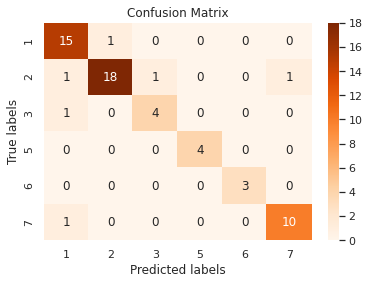

In [ ]:
conmatrix_rf=confusion_matrix(y_test,y_predict_rf)
df_cm =pd.DataFrame(conmatrix_rf, index=sorted(y_test['Type'].unique()), columns=sorted(y_test['Type'].unique()))
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(cv_rf.best_estimator_, f)

In [ ]:
with open("modelo.pkl", "rb") as f:
    modelo_pickle = pickle.load(f)

modelo_pickle

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

## UNDERSAMPLING
### Train Test Split to Undersampling

In [ ]:
np.random.seed(123)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, Y, test_size=0.3)

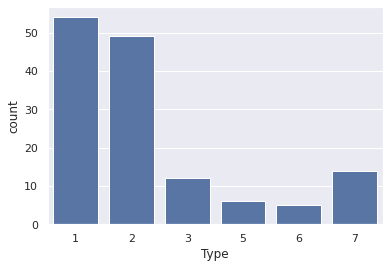

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_train_under['Type'],color='b')
plt.show()

### - Undersampling Multiclass

In [ ]:
y_train_under['Type'].unique()

array([2, 3, 1, 5, 7, 6])

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
X_train_under_balan, y_train_under_balan = oversample.fit_resample(X_train_under,np.ravel(y_train_under))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



ValueError: ignored

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_train_under_balan,color='b')
plt.show()


NameError: ignored

## Normalize numeric features (MinMaxScaler)
### - Normalize Train

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train_under_balan)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_under_balan_scaled = pd.DataFrame(scaler.transform(X_train_under_balan) ,columns = X_train_under.columns)
X_train_under_balan_scaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.996810,0.726804,0.469231,0.306962,0.097826,0.049919,0.420268,0.763636,0.000000
1,0.587719,0.434708,0.561538,0.417722,0.503623,0.000000,0.526080,0.000000,0.000000
2,0.653110,0.357388,0.907692,0.129747,0.500000,0.025765,0.461997,0.068182,0.648649
3,0.473684,0.247423,0.889744,0.458861,0.512681,0.106280,0.356185,0.000000,0.000000
4,0.681021,0.515464,0.000000,0.069620,0.650362,0.000000,0.809240,0.000000,0.000000


### - Normalize X_test_under

In [ ]:
X_test_under_scaled = pd.DataFrame(scaler.transform(X_test_under),index=X_test_under.index, columns = X_test_under.columns)
X_test_underscaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
207,0.570973,0.486254,0.000000,0.468354,0.538043,0.227053,0.101341,1.309091,0.0
199,0.393939,0.592784,0.000000,0.686709,0.572464,0.008052,0.453055,0.240909,0.0
185,0.012759,0.365979,0.820513,0.465190,0.528986,0.283414,-0.053651,0.540909,0.0
77,0.408293,0.247423,0.917949,0.379747,0.532609,0.098229,0.335320,0.000000,0.0
41,0.510367,0.197595,0.876923,0.272152,0.599638,0.095008,0.424739,0.000000,0.0


## Random Forest with previous Undersampling
### - Tunning model with GridSearchCV

In [ ]:
param_grid_rf_under = {'n_estimators':[100],'max_samples': [16,17], 'max_features': [3,4],'min_samples_split':[8,9] , 'criterion': ['entropy','gini'],'bootstrap':[False]}
#model = RandomForestClassifier(n_estimators=50, max_samples=60, max_features=4,min_samples_split=4,bootstrap=False,criterion='entropy')
                                      
model_rf_under = RandomForestClassifier(random_state=123)
grid_rf_under = GridSearchCV(model_rf_under, param_grid,cv=5)

### - Train RandomForest

In [ ]:
grid_rf_under.fit(X_train_under_balan_scaled, np.ravel(y_train_under_balan))
#grid_rf_under.cv_results_

{'mean_fit_time': array([0.13511038, 0.13440557, 0.12891278, 0.12987294, 0.14178319,
        0.13980455, 0.13930268, 0.1409164 , 0.10349579, 0.10324693,
        0.1043047 , 0.10283604, 0.10824485, 0.10620227, 0.1122869 ,
        0.10819149]),
 'mean_score_time': array([0.00927424, 0.00912499, 0.00967646, 0.00918136, 0.00897593,
        0.00907855, 0.00916739, 0.00910826, 0.00896478, 0.00913949,
        0.00928965, 0.00905542, 0.00949888, 0.00891685, 0.00991621,
        0.00933838]),
 'mean_test_score': array([0.90776515, 0.90189394, 0.90776515, 0.90189394, 0.88314394,
        0.88939394, 0.88314394, 0.88939394, 0.91420455, 0.90814394,
        0.91420455, 0.90814394, 0.89564394, 0.90189394, 0.89564394,
        0.90189394]),
 'param_bootstrap': masked_array(data=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False,
                   

### - Best estimator

In [ ]:
grid_rf_under.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### - Model predict

In [ ]:
y_predict_rf_under=grid_rf_under.best_estimator_.predict(X_test_under_scaled)

In [ ]:
print('Accuaracy train: ',cv_rf_under.best_estimator_.score(X_train_scaled_under, y_train_under_balan))
print('Accuaracy test: ',cv_rf_under.best_estimator_.score(X_test_scaled_under, y_test_under))
print('F1 score: ',f1_score(y_test_under,y_pred_under,average=None))
print('F1 score (micro): ',f1_score(y_test_under,y_pred_under,average='micro'))
print('F1 score (weighted): ',f1_score(y_test_under,y_pred_under,average='weighted'))
print('Recall: ',recall_score(y_test_under,y_pred_under,average=None))
print('Precision: ',precision_score(y_test_under,y_pred_under,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test_under,y_pred_under))

Accuaracy train:  1.0
Accuaracy test:  0.9069767441860465
F1 score:  [0.90909091 1.         0.72727273 0.8        1.         0.94736842]
F1 score (micro):  0.9069767441860465
F1 score (weighted):  0.915032825191944
Recall:  [0.83333333 1.         1.         1.         1.         0.9       ]
Precision:  [1.         1.         0.57142857 0.66666667 1.         1.        ]
Balanced Accuracy Score:  0.9555555555555557


In [ ]:
accuracy_train_rf_under=grid_rf_under.best_estimator_.score(X_train_under_balan_scaled, y_train_under)
accuracy_test_rf_under=grid_rf_under.best_estimator_.score(X_test_under_scaled, y_test_under)
f1score_rf_under=f1_score(y_test_under,y_predict_rf_under,average='micro')
recall_rf_under=recall_score(y_test_under,y_predict_rf_under,average=None)
precision_rf_under=precision_score(y_test_under,y_predict_rf_under,average=None)
balanced_accuracy_rf_under=balanced_accuracy_score(y_test_under,y_predict_rf_under)

print('Accuaracy train: ',accuracy_train_rf_under)
print('Accuaracy test: ',accuracy_test_rf_under)
print('F1 score (micro): ',f1score_rf_under)
print('Recall: ',recall_rf_under)
print('Precision: ',precision_rf_under)
print('Balanced Accuracy Score: ',precision_rf_under)

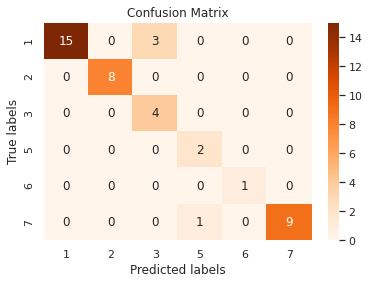

In [ ]:
conmatrix_rf=confusion_matrix(y_test_under,y_pred_under)
df_cm =pd.DataFrame(conmatrix_rf, index=sorted(y_test_under['type_of_glass'].unique()), columns=sorted(y_test_under['type_of_glass'].unique()))
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 